

<p style="text-align: center; font-size: 22px;">
   Amazon-Reviews-NLP-Model
    <br> Radwan Al Zoubi
    <br> Mays Nael Adeeb Abdel Rahman
</p>

<h2>Business Understanding</h2>

### &nbsp;&nbsp;&nbsp;&nbsp;- Abstract and Overview
<p style="padding: 20px; font-size: 18px;">The Amazon Reviews Polarity Dataset is a comprehensive collection of 34,686,770 customer reviews spanning 18 years of product feedback, sourced from the Stanford Network Analysis Project (SNAP). Containing reviews from 6,643,669 users across 2,441,053 products, the dataset provides a structured approach to understanding customer sentiments through a binary classification system.
</p>

### &nbsp;&nbsp;&nbsp;&nbsp;- Purpose 
<p style="padding: 20px; font-size: 18px;">The primary purpose of this dataset is to enable advanced sentiment analysis and machine learning research by offering a large-scale, meticulously curated collection of customer reviews. It serves as a critical resource for organizations seeking to transform raw customer feedback into actionable business intelligence, supporting strategic decision-making in product development, marketing, and customer experience optimization.</i>"</p>

### &nbsp;&nbsp;&nbsp;&nbsp;- Prediction Task and Third-Party Interest 
<p style="padding: 20px; font-size: 18px;">The dataset facilitates a binary sentiment classification task, categorizing reviews into two polarities: negative (1-2 star ratings) and positive (4-5 star ratings).
 The goal is to create predictive models that can automatically interpret customer feedback, understanding the nuanced language of consumer experiences. Third parties such as e-commerce platforms, market research firms, product development teams, and customer experience analytics companies are likely to be highly interested in these results. For them, an accurate sentiment prediction model could provide invaluable insights into product performance, customer satisfaction trends, and emerging market preferences. Organizations focused on improving customer experience, developing recommendation systems, or conducting competitive analysis would find significant value in the sophisticated text analysis capabilities enabled by this dataset. </p>

### &nbsp;&nbsp;&nbsp;&nbsp;- Data Aspects
<p style="padding: 20px; font-size: 18px;">The Amazon Reviews Polarity Dataset contains extensive textual features with multiple data types, encompassing 34,686,770 reviews from 6,643,669 users across 2,441,053 products. The dataset includes three primary columns: polarity (binary classification), review title (text), and review body (text). <br>
Dataset Source: <a href="https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews?resource=download" target="_blank">https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews?resource=download</a></p>

<h2>Data Understanding</h2>

<p>In this lab, we will develop binary classification sequential network models to predict the satisfaction level of customers based on product reviews on Amazon. The models will deployed offline due to the large number of samples that the dataset have also our machine computational capacity</p>

In [106]:
#Required dependencies
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Embedding, Input, Concatenate
from tensorflow.keras.layers import Subtract
from tensorflow.keras.utils import plot_model
from nltk.corpus import stopwords
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Layer
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import nltk
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    make_scorer,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay,
    roc_curve,
    auc)
from sklearn.preprocessing import LabelEncoder
import copy
from mlxtend.evaluate import mcnemar
from mlxtend.evaluate import mcnemar_table
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import Embedding


%matplotlib inline

<h2>1. Preparation</h2>

<p>Due to the limited computational capacity of our machines, we have decided to work with a subset of 50k reviews randomly selected from the original dataset, ensuring that the class distribution mirrors that of the original dataset. The dataset is structured into three columns: the first column (Labels) represents the review type, denoted as "1" for negative reviews and "2" for positive reviews. The second column contains the review header, representing the title of the review, while the third column contains the review body, representing the textual content of the review.</p>

In [107]:
df = pd.read_csv('ds/train.csv')
class_1_samples = df[df.iloc[:, 0] == 1].sample(n=25000, random_state=42)
class_2_samples = df[df.iloc[:, 0] == 2].sample(n=25000, random_state=42)
final_df = pd.concat([class_1_samples, class_2_samples])
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(final_df.head())


   2                     Stuning even for the non-gamer  \
0  2                              Corelle serving bowls   
1  1                                             Please   
2  1  The epitome of "scholarly but very hard to lea...   
3  1  2.5 ounce Estee Lauder Knowing...SELLER CANCEL...   
4  2                                       Entertaining   

  This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^  
0  I had broken a serving bowl and needed replace...                                                                                                                                                                                                  

In [108]:
final_df.columns = ['type', 'header', 'body']

<h2>1.1 Data Preprocessing</h2>

<h4>1.1.1 Droping the review title</h4>

<p>After carefully analyzing the dataset, we have decided to drop the review header from our classification model. This strategic decision allows us to focus exclusively on the review body text, which provides the most substantive and meaningful content for sentiment analysis. By removing the header, we aim to streamline our machine learning training process, reduce potential noise, and develop a more accurate model that captures the nuanced customer feedback contained within the full review text.</p>

In [109]:
final_df=final_df.drop(['header'],axis=1)

final_df.head()

,type,body
0,2,I had broken a serving bowl and needed replace...
1,1,Once again the perfect example of if Women wou...
2,1,"It's deep on the theory, and every little rare..."
3,1,I ordered this 2.5 ounce Estee Lauder Knowing ...
4,2,Fun toy for kids 4 and up but wish it had come...


<h4>1.1.2 One hot encode the Target Classes</h4>

<p> Reviews with negative sentiment will be assigned the label 0, while positive reviews will be designated as label 1.</p>

In [110]:
final_df['type'] = LabelEncoder().fit_transform(final_df['type'])

final_df.head()

,type,body
0,1,I had broken a serving bowl and needed replace...
1,0,Once again the perfect example of if Women wou...
2,0,"It's deep on the theory, and every little rare..."
3,0,I ordered this 2.5 ounce Estee Lauder Knowing ...
4,1,Fun toy for kids 4 and up but wish it had come...


<h4>1.1.3 Data Preparation
</h4>

<p>- Lowercase Conversion: All text will be converted to lowercase to ensure consistency and prevent case-based token variations.</p>

In [111]:
for l in range(len(final_df['body'])):
    final_df.loc[l,'body'] = final_df['body'][l].lower()

final_df.head()

,type,body
0,1,i had broken a serving bowl and needed replace...
1,0,once again the perfect example of if women wou...
2,0,"it's deep on the theory, and every little rare..."
3,0,i ordered this 2.5 ounce estee lauder knowing ...
4,1,fun toy for kids 4 and up but wish it had come...


<p>- Number Removal: Numerical data will be removed as it is not considered relevant for this analysis.</p>

In [112]:
for n in range(len(final_df['body'])):
    final_df.loc[n,'body'] = re.sub(r'\d+', '', final_df['body'][n])

final_df.head()

,type,body
0,1,i had broken a serving bowl and needed replace...
1,0,once again the perfect example of if women wou...
2,0,"it's deep on the theory, and every little rare..."
3,0,i ordered this . ounce estee lauder knowing an...
4,1,fun toy for kids and up but wish it had come ...


<p>- Punctuation Removal: Punctuation marks will be removed as they generally do not contribute to the meaning in this context.</p>

In [113]:
for p in range(len(final_df['body'])):
    final_df.loc[p,'body'] = final_df['body'][p].translate(str.maketrans('','',string.punctuation))

final_df.head()

,type,body
0,1,i had broken a serving bowl and needed replace...
1,0,once again the perfect example of if women wou...
2,0,its deep on the theory and every little rarely...
3,0,i ordered this ounce estee lauder knowing and...
4,1,fun toy for kids and up but wish it had come ...


<p>- Whitespace Removal: Extra whitespace will be removed to standardize the text format and ensure consistent tokenization.</p>

In [114]:
for st in range(len(final_df['body'])):
    final_df.loc[st,'body'] = final_df['body'][st].strip()

final_df.head()

,type,body
0,1,i had broken a serving bowl and needed replace...
1,0,once again the perfect example of if women wou...
2,0,its deep on the theory and every little rarely...
3,0,i ordered this ounce estee lauder knowing and...
4,1,fun toy for kids and up but wish it had come ...


<p>- Single-Letter Word Removal: Single-letter words (excluding those in the stop word list) will be removed to further refine the data.</p>

In [115]:
for ol in range(len(final_df['body'])):
    final_df.loc[ol,'body'] = re.sub(r'(?:\b\w{1}\s|\s\w{1}\b|\b\w{1}\b)', '', final_df['body'][ol])


<p>- Stop Word Removal: Common, low-information words (stop words) such as "the," "is," and "and" will be removed to focus on more meaningful terms.</p>

In [116]:
stop_words = set(stopwords.words('english'))

for sw in range(len(final_df['body'])):
    word_split = final_df['body'][sw].split()
    stop_words_removed = [swr for swr in word_split if not swr in stop_words]
    final_df.loc[sw,'body'] = ' '.join(stop_words_removed)



<h4>1.1.4 Final Dataset</h4>

In [117]:
data = final_df['body'].copy() 

labels = final_df['type'].copy()

print('Reviews:')
print('--------------------------------------------------------')
print(data.head())
print('')
print('========================================================')
print('')
print('Reviews_Targets:')
print('--------------------------------------------------------')
print(labels.head())

Reviews:
--------------------------------------------------------
0    broken serving bowl needed replacement bought ...
1    perfect example women would needy men would lo...
2    deep theory every little rarelyused theorem do...
3    ordered ounce estee lauder knowing seller canc...
4    fun toy kids wish come spare parts dominoes cl...
Name: body, dtype: object


Reviews_Targets:
--------------------------------------------------------
0    1
1    0
2    0
3    0
4    1
Name: type, dtype: int64


<h4>1.1.5 Tokenization </h4>

<p>Tokenization breaks down text into smaller units called tokens (typically words or characters) for further processing and analysis. The dataset's maximum character length is 913. With an average word length of 14 and an average character length of 254.4208 per review, approximately 400 characters (covering about 80.8% of the reviews) represent a reasonable length for analysis. Therefore, the MAX_ART_LEN parameter for tokenization was set to 400 to capture this range while preserving readability. Each word in every review was tokenized and assigned a unique integer, transforming each review into a sequence of integers representing word order. This process resulted in 110,489 unique words, each with its own corresponding integer.</p>

In [118]:
max_length_char = 0
min_length_char = 1000
total_length = 0
num_reviews = len(data)


for review in data:
    review_length = len(review)
    total_length += review_length
    
    if review_length > max_length_char:
        max_length_char = review_length
    elif review_length < min_length_char:
        min_length_char = review_length


avg_length_char = total_length / num_reviews if num_reviews > 0 else 0


print('The max characters length: ', max_length_char)
print('The min characters length: ', min_length_char)
print('The average characters length: ', avg_length_char)


The max characters length:  913
The min characters length:  14
The average characters length:  254.4208


Range 0-49: 398 instances
Range 50-99: 7658 instances
Range 100-149: 7774 instances
Range 150-199: 6645 instances
Range 200-249: 5587 instances
Range 250-299: 4854 instances
Range 300-349: 4061 instances
Range 350-399: 3372 instances
Range 400-449: 2818 instances
Range 450-499: 2359 instances
Range 500-549: 1949 instances
Range 550-599: 1508 instances
Range 600-649: 777 instances
Range 650-699: 203 instances
Range 700-749: 28 instances
Range 750-799: 3 instances
Range 800-849: 2 instances
Range 850-899: 3 instances
Range 900-949: 1 instances


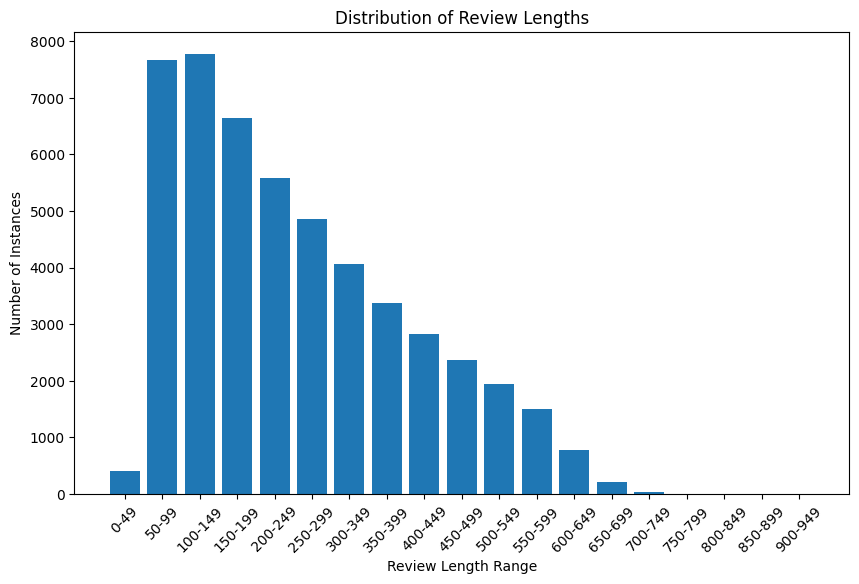

In [119]:
review_lengths = [len(review) for review in data]


bin_size = 50
max_review_length = max(review_lengths)
bins = list(range(0, max_review_length + bin_size, bin_size))


range_counts = np.histogram(review_lengths, bins=bins)[0]


for i in range(len(range_counts)):
    print(f"Range {bins[i]}-{bins[i+1]-1}: {range_counts[i]} instances")


max_range_index = np.argmax(range_counts)
best_range_start = bins[max_range_index]
best_range_end = bins[max_range_index + 1] - 1


plt.figure(figsize=(10, 6))
plt.bar([f"{bins[i]}-{bins[i+1]-1}" for i in range(len(range_counts))], range_counts)
plt.xlabel('Review Length Range')
plt.ylabel('Number of Instances')
plt.title('Distribution of Review Lengths')
plt.xticks(rotation=45)
plt.show()


In [120]:
count_less_than_equal_400 = sum(1 for review in data if len(review) <= 400)


print(f"Number of reviews with length less than or equal to 400 characters: {count_less_than_equal_400}")

Number of reviews with length less than or equal to 400 characters: 40394


In [121]:
count_less_than_equal_400/len(data)*100


80.78800000000001

In [122]:
%%time


NUM_TOP_WORDS = None # use entire vocabulary!
MAX_ART_LEN = 400


tokenizer = Tokenizer(num_words=NUM_TOP_WORDS)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)

word_index = tokenizer.word_index
NUM_TOP_WORDS = len(word_index) if NUM_TOP_WORDS==None else NUM_TOP_WORDS
top_words = min((len(word_index),NUM_TOP_WORDS))
print('Found %s unique tokens. Distilled to %d top words.' % (len(word_index),top_words))

X = pad_sequences(sequences, maxlen=MAX_ART_LEN)

y = labels
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)
print('Vocabulary size: ', np.max(X))

Found 110489 unique tokens. Distilled to 110489 top words.
Shape of data tensor: (50000, 400)
Shape of label tensor: (50000,)
Vocabulary size:  110489
CPU times: total: 2.11 s
Wall time: 2.22 s


<h2>1.2 Evaluation metrics
</h2>

<p>This model aims to predict customer satisfaction from Amazon product reviews using a balanced dataset (as illustrated in the figure). A key concern is the occurrence of false positives, where the model incorrectly classifies a negative review as positive. These misclassifications are costly, potentially leading to flawed business decisions based on inaccurate assumptions of customer satisfaction. Precision, which measures the proportion of true positive predictions among all positive predictions, is therefore the chosen evaluation metric. Prioritizing precision minimizes false positives by ensuring the reliability and accuracy of positive predictions.</p>

In [123]:
metrics = [keras.metrics.Precision()]

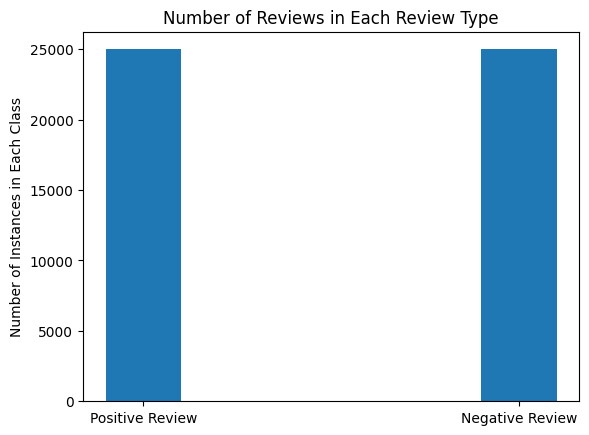

In [124]:
unique_targets = y.value_counts()

plt.bar([1,2],unique_targets, width = 0.2)
plt.xticks([1,2],['Positive Review','Negative Review'])
plt.ylabel("Number of Instances in Each Class")
plt.title('Number of Reviews in Each Review Type')
plt.show()

<h2>1.3 Splitting of the dataset</h2>

<p>Our dataset was split into training (80%) and testing (20%) sets using stratified shuffling due to the size of our dataset(we have enough samples that represent the data). This method ensures that the class distribution within the original dataset is maintained in both the training and testing subsets. The shuffling aspect randomly partitions the data, which helps mitigate bias and variance in model evaluation. The 80/20 split offers a balanced approach, providing ample data for training while retaining a substantial portion for robust evaluation.</p>

X_train Shape: (40000, 400)
Label Train Shape: (40000,)

X_test Shape: (10000, 400)
Label Test Shape: (10000,)



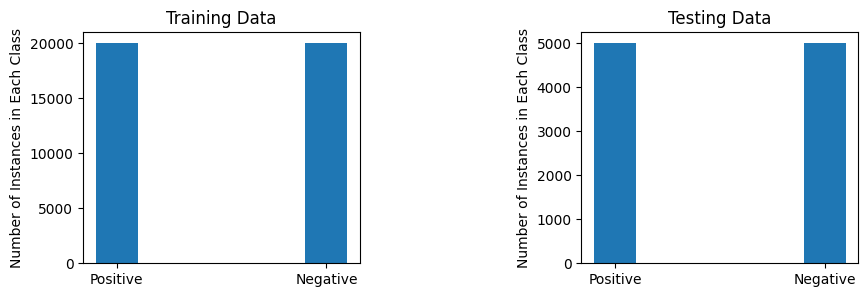

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                           stratify=y,
                                                           random_state=7324, 
                                                            shuffle=True)


print("X_train Shape:",X_train.shape)
print("Label Train Shape:", y_train.shape)
print('')
print("X_test Shape:",X_test.shape)
print("Label Test Shape:", y_test.shape)
print('')

uniq_classes_train = np.sum(y_train,axis=0)
uniq_classes_test = np.sum(y_test,axis=0)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.8)
plt.bar(list(range(2)),uniq_classes_train, width=0.2)
plt.xticks(list(range(2)), ['Positive','Negative'])
plt.ylabel("Number of Instances in Each Class")
plt.title('Training Data')

plt.subplot(1,2,2)
plt.bar(list(range(2)),uniq_classes_test, width=0.2)
plt.xticks(list(range(2)), ['Positive','Negative'])
plt.ylabel("Number of Instances in Each Class")
plt.title('Testing Data')

plt.show()

<h2>2. Modeling</h2>

<p>Four sequential network models were trained: two using Convolutional Neural Network (CNN-1 and CNN-2) architectures and two using transformer (transformer-1 and transformer-2) architectures. All models utilized pre-trained 100-dimensional GloVe 6b embeddings. To improve training efficiency and reduce computation time, a progressive training approach was employed.</p>

In [126]:
%%time

EMBED_SIZE = 100
embeddings_index = {}
f = open(r'glove\glove.6B.100d.txt', encoding="utf-8")




for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


found_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 400000 word vectors.
Embedding Shape: (110490, 100) 
 Total words found: 53974 
 Percentage: 48.8496696533623
CPU times: total: 9.09 s
Wall time: 9.68 s


In [127]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],
                            input_length=MAX_ART_LEN,
                            trainable=False)

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<h4>2.1.1 CNN-1</h4>

<p>CNN-1 is a sequential CNN model for binary classification. It uses an embedding layer, two Conv1D layers (64 and 32 filters), max pooling, dropout, and a novel approach of calculating and concatenating the mean and standard deviation of the second Conv1D layer's output using GlobalAveragePooling. This combined vector is then passed through a dense layer with dropout before a final sigmoid output layer. The model uses Adam optimization (lr=0.0001, epsilon=0.0001, clipnorm=1), binary cross-entropy loss, and precision as the evaluation metric.</p>

In [128]:
NUM_CLASSES =1


sequence_input = Input(shape=(MAX_ART_LEN,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(64, 3, activation='relu')(embedded_sequences)

x = MaxPooling1D(3)(x)
x = Dropout(0.2)(x)
x = Conv1D(32, 3, activation='relu')(x)


x_mean = GlobalAveragePooling1D()(x) 

x_tmp = Subtract()([x,x_mean])
x_std = GlobalAveragePooling1D()(x_tmp**2)

x = Concatenate(name='concat_1')([x_mean,x_std])

x = Dense(25, activation='relu')(x)

x = Dropout(0.2)(x)

preds = Dense(NUM_CLASSES, activation='sigmoid')(x)

model_cnn1 = Model(sequence_input, preds)

opt = Adam(learning_rate=0.0001, epsilon=0.0001, clipnorm=1)

model_cnn1.compile(loss='binary_crossentropy', 
              optimizer=opt,
              metrics=['Precision'])

print(model_cnn1.summary())

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)   │ (None, 400)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_21 (Embedding)      │ (None, 400, 100)          │      11,049,000 │ input_layer_24[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_6 (Conv1D)             │ (None, 398, 64)           │          19,264 │ embedding_21[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_3               │ (None, 132, 64)           │               0 │ conv1d_6[0][0]             │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_59 (Dropout)          │ (None, 132, 64)           │               0 │ max_pooling1d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_7 (Conv1D)             │ (None, 130, 32)           │           6,176 │ dropout_59[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d_13   │ (None, 32)                │               0 │ conv1d_7[0][0]             │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ subtract_3 (Subtract)         │ (None, 130, 32)           │               0 │ conv1d_7[0][0],            │
│                               │                           │                 │ global_average_pooling1d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ power_3 (Power)               │ (None, 130, 32)           │               0 │ subtract_3[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d_14   │ (None, 32)                │               0 │ power_3[0][0]              │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concat_1 (Concatenate)        │ (None, 64)                │               0 │ global_average_pooling1d_… │
│                               │                           │                 │ global_average_pooling1d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_48 (Dense)              │ (None, 25)                │           1,625 │ concat_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_60 (Dropout)          │ (None, 25)                │               0 │ dense_48[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_49 (Dense)              │ (None, 1)                 │              26 │ dropout_60[0][0]           │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 11,076,091 (42.25 MB)

 Trainable params: 27,091 (105.82 KB)

 Non-trainable params: 11,049,000 (42.15 MB)

None


In [129]:
precision_cnn1 = []
tmp = model_cnn1.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=25, batch_size=64)
precision_cnn1.append(tmp)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - Precision: 0.5443 - loss: 0.6895 - val_Precision: 0.6759 - val_loss: 0.6331
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - Precision: 0.6856 - loss: 0.6127 - val_Precision: 0.7694 - val_loss: 0.5563
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - Precision: 0.7203 - loss: 0.5622 - val_Precision: 0.7639 - val_loss: 0.5349
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - Precision: 0.7408 - loss: 0.5391 - val_Precision: 0.7526 - val_loss: 0.5186
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - Precision: 0.7480 - loss: 0.5255 - val_Precision: 0.7552 - val_loss: 0.5047
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - Precision: 0.7519 - loss: 0.5126 - val_Precision: 0.7707 - val_loss: 0.4941
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - Precision: 0.7563 - loss: 0.5013 - val_Precision: 0.7767 - val_loss: 0.4866
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - Precision: 0.7628 - 

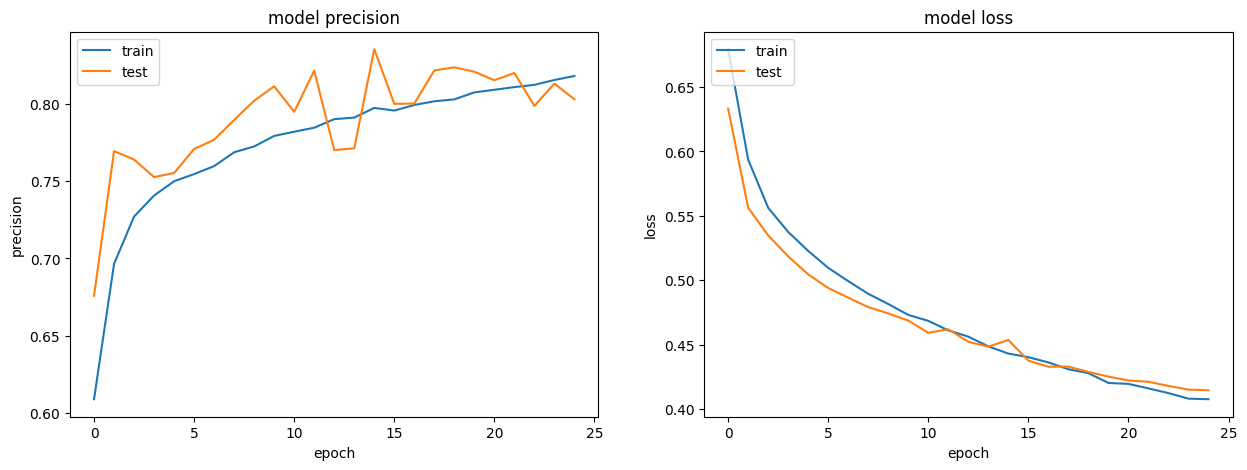

In [130]:
combined = dict()
for key in ['Precision','val_Precision','loss','val_loss']:
    combined[key] = np.hstack([x.history[key] for x in precision_cnn1])
    

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(combined['Precision'])
plt.plot(combined['val_Precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(122)
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [131]:
tmp = model_cnn1.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=64)
precision_cnn1.append(tmp)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - Precision: 0.8223 - loss: 0.4007 - val_Precision: 0.8140 - val_loss: 0.4122
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - Precision: 0.8230 - loss: 0.3978 - val_Precision: 0.8257 - val_loss: 0.4125
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - Precision: 0.8278 - loss: 0.3955 - val_Precision: 0.8162 - val_loss: 0.4115
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - Precision: 0.8239 - loss: 0.3940 - val_Precision: 0.8374 - val_loss: 0.4155
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - Precision: 0.8233 - loss: 0.3909 - val_Precision: 0.8131 - val_loss: 0.4089
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - Precision: 0.8256 - loss: 0.3869 - val_Precision: 0.7822 - val_loss: 0.4162
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - Precision: 0.8272 - loss: 0.3911 - val_Precision: 0.8118 - val_loss: 0.4053
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - Precision: 0.8296 - 

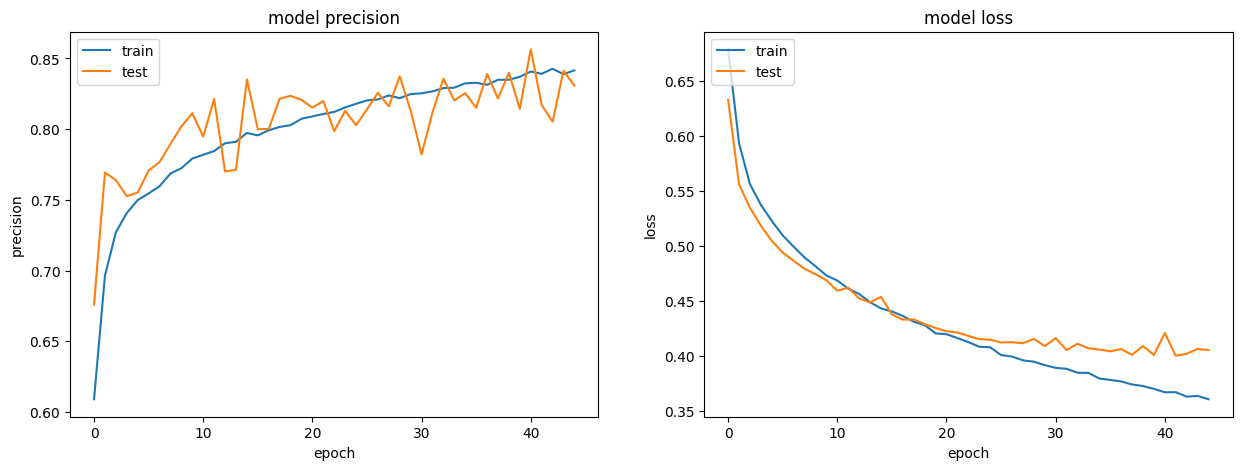

In [132]:
combined = dict()
for key in ['Precision','val_Precision','loss','val_loss']:
    combined[key] = np.hstack([x.history[key] for x in precision_cnn1])
    

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(combined['Precision'])
plt.plot(combined['val_Precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(122)
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [133]:
y_predict_proba = model_cnn1.predict(X_test)
y_predict = np.round(y_predict_proba)

print(classification_report(y_test, y_predict))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      5000
           1       0.83      0.80      0.82      5000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



<h4>2.1.2 CNN-2</h4>

<p>Model 2 (CNN-2) has the same architecture of Model 1 (CNN-1), a conventional neural network but the number of the second conv1d layer filters increased into 64.</p>

In [134]:
NUM_CLASSES =1


sequence_input = Input(shape=(MAX_ART_LEN,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(64, 3, activation='relu')(embedded_sequences)

x = MaxPooling1D(3)(x)
x = Dropout(0.2)(x)
x = Conv1D(64, 3, activation='relu')(x)


x_mean = GlobalAveragePooling1D()(x) 

x_tmp = Subtract()([x,x_mean])
x_std = GlobalAveragePooling1D()(x_tmp**2)

x = Concatenate(name='concat_1')([x_mean,x_std])

x = Dense(25, activation='relu')(x)

x = Dropout(0.2)(x)

preds = Dense(NUM_CLASSES, activation='sigmoid')(x)

model_cnn2 = Model(sequence_input, preds)

opt = Adam(learning_rate=0.0001, epsilon=0.0001, clipnorm=1)

model_cnn2.compile(loss='binary_crossentropy', 
              optimizer=opt,
              metrics=['Precision'])

print(model_cnn2.summary())

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)   │ (None, 400)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_21 (Embedding)      │ (None, 400, 100)          │      11,049,000 │ input_layer_25[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_8 (Conv1D)             │ (None, 398, 64)           │          19,264 │ embedding_21[1][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_4               │ (None, 132, 64)           │               0 │ conv1d_8[0][0]             │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_61 (Dropout)          │ (None, 132, 64)           │               0 │ max_pooling1d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_9 (Conv1D)             │ (None, 130, 64)           │          12,352 │ dropout_61[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d_15   │ (None, 64)                │               0 │ conv1d_9[0][0]             │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ subtract_4 (Subtract)         │ (None, 130, 64)           │               0 │ conv1d_9[0][0],            │
│                               │                           │                 │ global_average_pooling1d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ power_4 (Power)               │ (None, 130, 64)           │               0 │ subtract_4[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d_16   │ (None, 64)                │               0 │ power_4[0][0]              │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concat_1 (Concatenate)        │ (None, 128)               │               0 │ global_average_pooling1d_… │
│                               │                           │                 │ global_average_pooling1d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_50 (Dense)              │ (None, 25)                │           3,225 │ concat_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_62 (Dropout)          │ (None, 25)                │               0 │ dense_50[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_51 (Dense)              │ (None, 1)                 │              26 │ dropout_62[0][0]           │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 11,083,867 (42.28 MB)

 Trainable params: 34,867 (136.20 KB)

 Non-trainable params: 11,049,000 (42.15 MB)

None


In [135]:
precision_cnn2=[]
tmp = model_cnn2.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=45, batch_size=64)
precision_cnn2.append(tmp)

Epoch 1/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - Precision: 0.6201 - loss: 0.6881 - val_Precision: 0.6673 - val_loss: 0.6223
Epoch 2/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - Precision: 0.7014 - loss: 0.5994 - val_Precision: 0.7173 - val_loss: 0.5528
Epoch 3/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - Precision: 0.7334 - loss: 0.5568 - val_Precision: 0.7243 - val_loss: 0.5352
Epoch 4/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - Precision: 0.7371 - loss: 0.5417 - val_Precision: 0.7585 - val_loss: 0.5160
Epoch 5/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - Precision: 0.7519 - loss: 0.5218 - val_Precision: 0.7520 - val_loss: 0.5027
Epoch 6/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - Precision: 0.7591 - loss: 0.5085 - val_Precision: 0.7569 - val_loss: 0.4933
Epoch 7/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - Precision: 0.7650 - loss: 0.4966 - val_Precision: 0.7632 - val_loss: 0.4840
Epoch 8/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - Precision: 0.7651 - 

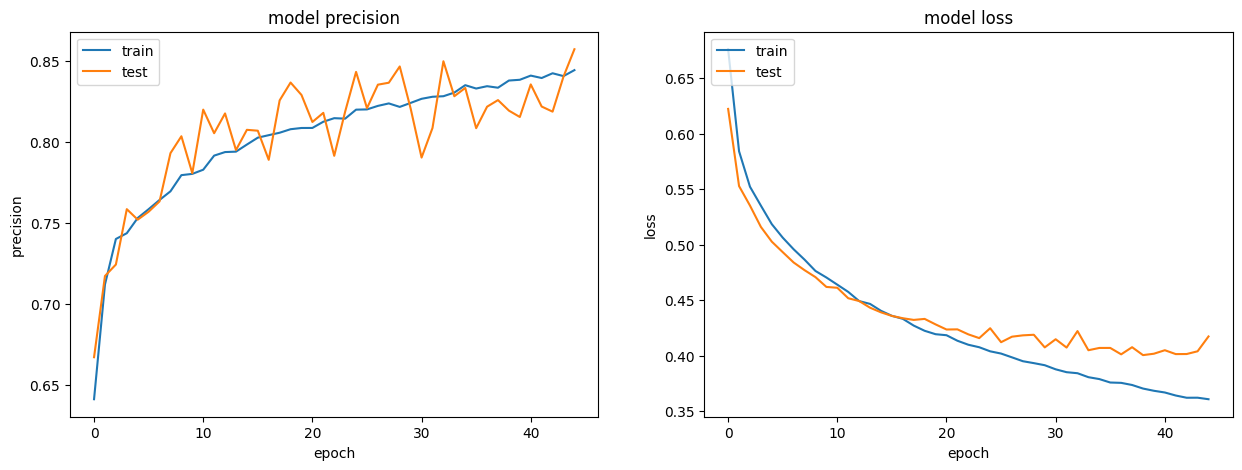

In [136]:
combined = dict()
for key in ['Precision','val_Precision','loss','val_loss']:
    combined[key] = np.hstack([x.history[key] for x in precision_cnn2])
    

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(combined['Precision'])
plt.plot(combined['val_Precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(122)
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [137]:
y_predict_proba = model_cnn2.predict(X_test)
y_predict = np.round(y_predict_proba)

print(classification_report(y_test, y_predict))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      5000
           1       0.86      0.75      0.80      5000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



<h4>2.1.3 Model 3 using Transformers</h4>

In [138]:
# The transformer architecture 
class TransformerBlock(Layer): # inherit from Keras Layer
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.2):
        super().__init__()
        # setup the model heads and feedforward network
        self.att = MultiHeadAttention(num_heads=num_heads, 
                                      key_dim=embed_dim)
        
        # make a two layer network that processes the attention
        self.ffn = Sequential()
        self.ffn.add( Dense(ff_dim, activation='relu') )
        self.ffn.add( Dense(embed_dim) )
        
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=None):
        # apply the layers as needed (similar to PyTorch)
        
        # get the attention output from multi heads
        # Using same inpout here is self-attention
        # call inputs are (query, value, key) 
        # if only two inputs given, value and key are assumed the same
        attn_output = self.att(inputs, inputs)
        
        # create residual output, with attention
        out1 = self.layernorm1(inputs + attn_output)
        
        # apply dropout if training
        out1 = self.dropout1(out1, training=training)
        
        # place through feed forward after layer norm
        ffn_output = self.ffn(out1)
        out2 = self.layernorm2(out1 + ffn_output)
        
        # apply dropout if training
        out2 = self.dropout2(out2, training=training)
        #return the residual from Dense layer
        return out2
    
class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        # create two embeddings 
        # one for processing the tokens (words)
        self.token_emb = Embedding(input_dim=vocab_size, 
                                   output_dim=embed_dim)
        # another embedding for processing the position
        self.pos_emb = Embedding(input_dim=maxlen, 
                                 output_dim=embed_dim)

    def call(self, x):
        # create a static position measure (input)
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        # positions now goes from 0 to 500 (for IMdB) by 1
        positions = self.pos_emb(positions)# embed these positions
        x = self.token_emb(x) # embed the tokens
        return x + positions # add embeddngs to get final embedding

In [139]:
# first, let's replace the original embedding in the xformer
# with our custom GloVe embedding

class GloveTokenAndPositionEmbedding(Layer):
    def __init__(self):
        super().__init__()
        # create two embeddings 
        # one for processing the tokens, pretrained (words)
        self.token_emb = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],# here is the embedding getting saved
                            input_length=MAX_ART_LEN,
                            trainable=False)
        
        # another embedding for processing the position
        self.pos_emb = Embedding(MAX_ART_LEN, 
                                 EMBED_SIZE, 
                                 input_length=MAX_ART_LEN,
                                 trainable=True
                                )

    def call(self, x):
        # create a static position measure (input)
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        # positions now goes from 0 to 500 (for IMdB) by 1
        positions = self.pos_emb(positions)# embed these positions
        x = self.token_emb(x) # embed the tokens
        return x + positions # add embeddngs to get final embedding

<p>Transformer-1 is a binary classification model using a single Transformer block. It combines GloVe word embeddings with positional embeddings, applies multi-head attention (2 heads) and a feed-forward network within the Transformer block, performs global average pooling, and uses dense layers with dropout for regularization before a final sigmoid output.</p>

In [140]:
num_heads = 2  
ff_dim = 32  

inputs = Input(shape=(X_train.shape[1],))
x = GloveTokenAndPositionEmbedding()(inputs)
x = TransformerBlock(EMBED_SIZE, num_heads, ff_dim)(x,training=True)

x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
preds = Dense(NUM_CLASSES, activation='sigmoid',
              kernel_initializer='glorot_uniform')(x)

model_tranformer1 = Model(inputs=inputs, outputs=preds)
print(model_tranformer1.summary())

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)          │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ glove_token_and_position_embedding_… │ (None, 400, 100)            │      11,089,000 │
│ (GloveTokenAndPositionEmbedding)     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_14                 │ (None, 400, 100)            │          87,632 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_17          │ (None, 100)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,183,161 (42.66 MB)

 Trainable params: 134,161 (524.07 KB)

 Non-trainable params: 11,049,000 (42.15 MB)

None


In [141]:
opt = Adam(learning_rate=0.0001, epsilon=0.0001, clipnorm=1)

model_tranformer1.compile(loss='binary_crossentropy', 
              optimizer=opt,
              metrics=['Precision'])
precision_tranformer1 = []
tmp = model_tranformer1.fit(X_train, y_train, 
                validation_data=(X_test, y_test),
               epochs=10, batch_size=64)
precision_tranformer1.append(tmp)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 181s 286ms/step - Precision: 0.6257 - loss: 0.6335 - val_Precision: 0.7598 - val_loss: 0.5105
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 177s 284ms/step - Precision: 0.7530 - loss: 0.5183 - val_Precision: 0.8029 - val_loss: 0.5067
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 284ms/step - Precision: 0.7657 - loss: 0.4963 - val_Precision: 0.7960 - val_loss: 0.4700
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 284ms/step - Precision: 0.7865 - loss: 0.4661 - val_Precision: 0.7896 - val_loss: 0.4519
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 284ms/step - Precision: 0.7909 - loss: 0.4473 - val_Precision: 0.7933 - val_loss: 0.4379
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 285ms/step - Precision: 0.7901 - loss: 0.4437 - val_Precision: 0.8161 - val_loss: 0.4389
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 179s 287ms/step - Precision: 0.7968 - loss: 0.4340 - val_Precision: 0.8295 - val_loss: 0.4302
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 179s 286ms/step - Prec

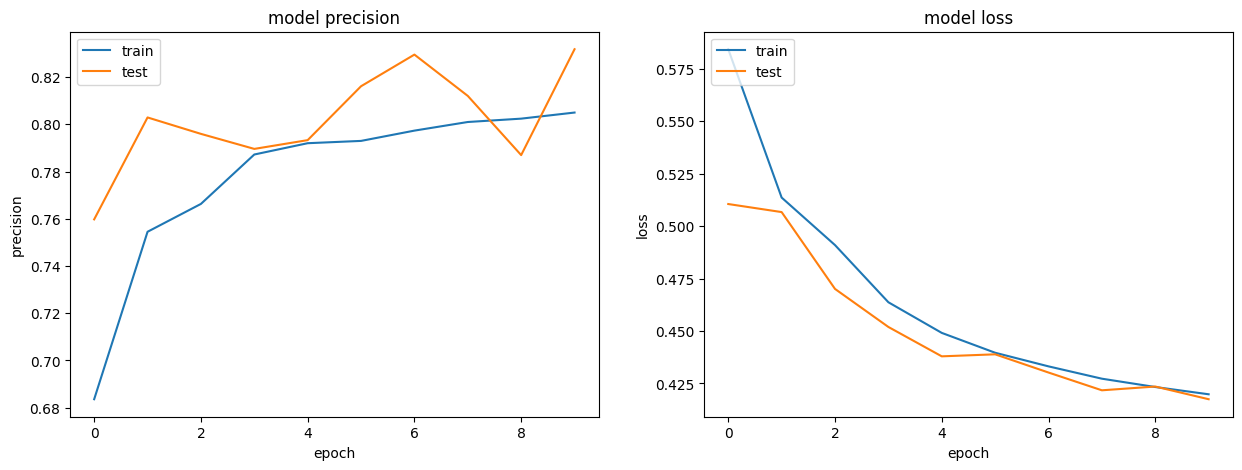

In [142]:
combined = dict()
for key in ['Precision','val_Precision','loss','val_loss']:
    combined[key] = np.hstack([x.history[key] for x in precision_tranformer1])
    

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(combined['Precision'])
plt.plot(combined['val_Precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(122)
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h4>2.1.4 Model 4 using Transformers </h4>

<p>Model 4 has the architecture of Model 3 but the number of heads increased to 4.</p>

In [143]:
num_heads = 4  
ff_dim = 32  

inputs = Input(shape=(X_train.shape[1],))
x = GloveTokenAndPositionEmbedding()(inputs)
x = TransformerBlock(EMBED_SIZE, num_heads, ff_dim)(x,training=True)

x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
preds = Dense(NUM_CLASSES, activation='sigmoid',
              kernel_initializer='glorot_uniform')(x)

model_tranformer2 = Model(inputs=inputs, outputs=preds)
print(model_tranformer2.summary())

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_28 (InputLayer)          │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ glove_token_and_position_embedding_… │ (None, 400, 100)            │      11,089,000 │
│ (GloveTokenAndPositionEmbedding)     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_15                 │ (None, 400, 100)            │         168,232 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_18          │ (None, 100)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_71 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_72 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,263,761 (42.97 MB)

 Trainable params: 214,761 (838.91 KB)

 Non-trainable params: 11,049,000 (42.15 MB)

None


In [144]:
opt = Adam(learning_rate=0.0001, epsilon=0.0001, clipnorm=1)

model_tranformer2.compile(loss='binary_crossentropy', 
              optimizer=opt,
              metrics=['Precision'])
precision_tranformer2 = []
tmp = model_tranformer2.fit(X_train, y_train, 
                validation_data=(X_test, y_test),
               epochs=10, batch_size=64)
precision_tranformer2.append(tmp)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 299s 474ms/step - Precision: 0.6326 - loss: 0.6272 - val_Precision: 0.7378 - val_loss: 0.5122
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 295s 473ms/step - Precision: 0.7564 - loss: 0.5188 - val_Precision: 0.7562 - val_loss: 0.5004
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 295s 472ms/step - Precision: 0.7616 - loss: 0.5049 - val_Precision: 0.8443 - val_loss: 0.5383
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 296s 474ms/step - Precision: 0.7665 - loss: 0.4964 - val_Precision: 0.8151 - val_loss: 0.4828
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 296s 473ms/step - Precision: 0.7761 - loss: 0.4755 - val_Precision: 0.7900 - val_loss: 0.4573
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 296s 473ms/step - Precision: 0.7954 - loss: 0.4504 - val_Precision: 0.8267 - val_loss: 0.4536
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 296s 473ms/step - Precision: 0.8005 - loss: 0.4430 - val_Precision: 0.8074 - val_loss: 0.4355
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 296s 474ms/step - Prec

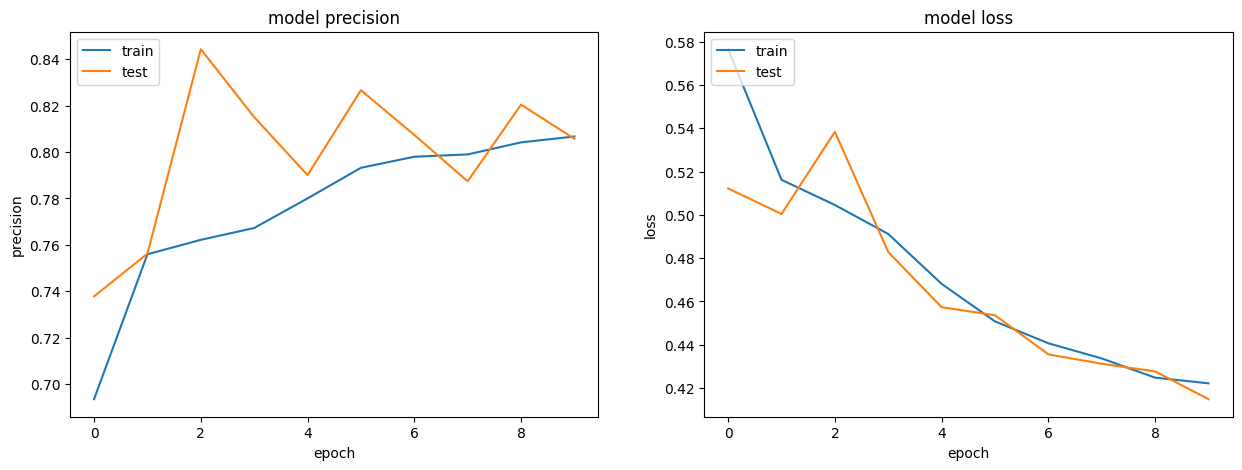

In [145]:
combined = dict()
for key in ['Precision','val_Precision','loss','val_loss']:
    combined[key] = np.hstack([x.history[key] for x in precision_tranformer2])
    

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(combined['Precision'])
plt.plot(combined['val_Precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(122)
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [146]:
y_predict_proba = model_tranformer1.predict(X_test)
y_predict = np.round(y_predict_proba)


print(classification_report(y_test, y_predict))

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      5000
           1       0.83      0.79      0.81      5000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [147]:
y_predict_proba = model_tranformer2.predict(X_test)
y_predict = np.round(y_predict_proba)


print(classification_report(y_test, y_predict))

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      5000
           1       0.81      0.82      0.81      5000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [148]:
yhat_modelt3 = np.argmax(model_tranformer1.predict(X_test), axis=1)
yhat_modelt4 = np.argmax(model_tranformer2.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step


In [149]:
print('The comparison between Transformer 1 and Transformer 2 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_modelt3, y_model2=yhat_modelt4)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 4 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')

The comparison between Transformer 1 and Transformer 2 with 95% confidence interval is as follows:
[[5000    0]
 [   0 5000]]
chi² statistic: inf, p-value: 0.0
Different proportions of errors (reject Null Hypothesis)


C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\evaluate\mcnemar.py:209: RuntimeWarning: divide by zero encountered in scalar divide
  chi2 = (abs(ary[0, 1] - ary[1, 0]) - 1.0) ** 2 / float(n)


In the comparison between Transformer 1 and Transformer 2, both models achieve an overall accuracy of 81% and similar F1-scores. However, when prioritizing precision as the key performance metric, Transformer 1 emerges as the better model. For class 0, Transformer 1 achieves a precision of 0.82, while Transformer 2 achieves a slightly higher precision of 0.83. More notably, for class 1, Transformer 1 performs better with a precision of 0.81 compared to Transformer 2’s 0.79. This indicates that Transformer 1 maintains a more balanced precision across both classes, minimizing false positives more effectively. Although Transformer 2 has marginally higher precision for class 0, its lower precision for class 1 could be detrimental in applications where precision is critical. Therefore, based on the precis
ion metric, Transformer 1 is the preferable model, offering more consistent and reliable performance across both classes.

<h4>2.2 Model 5 using best transformer parameters(Model 3)</h4>

<p>Transformer-2 is a binary classification model that builds upon the Transformer architecture by using two stacked Transformer blocks. Like its predecessor, it starts by combining GloVe word embeddings with positional embeddings using a custom layer. The embedded sequences are then processed by two consecutive TransformerBlock layers, each employing multi-head attention (2 heads) and a feed-forward network with a hidden dimension of 32. Global average pooling reduces the sequence to a single vector, followed by dropout regularization (0.2). A dense layer with 64 units and ReLU activation, followed by another dropout layer (0.2), precedes the final output layer. This output layer uses a sigmoid activation function and Glorot uniform kernel initialization to produce the binary classification prediction. The model is constructed using the Keras Functional API.</p>

In [150]:
num_heads = 2 
ff_dim = 32  

inputs = Input(shape=(X_train.shape[1],))
x = GloveTokenAndPositionEmbedding()(inputs)
x = TransformerBlock(EMBED_SIZE, num_heads, ff_dim)(x,training=True)
x = TransformerBlock(EMBED_SIZE, num_heads, ff_dim)(x,training=True)

x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
preds = Dense(NUM_CLASSES, activation='sigmoid',
              kernel_initializer='glorot_uniform')(x)

model_tranformer2l = Model(inputs=inputs, outputs=preds)
print(model_tranformer2l.summary())

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)          │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ glove_token_and_position_embedding_… │ (None, 400, 100)            │      11,089,000 │
│ (GloveTokenAndPositionEmbedding)     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_16                 │ (None, 400, 100)            │          87,632 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_17                 │ (None, 400, 100)            │          87,632 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_19          │ (None, 100)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_79 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_80 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,270,793 (42.99 MB)

 Trainable params: 221,793 (866.38 KB)

 Non-trainable params: 11,049,000 (42.15 MB)

None


In [151]:
opt = Adam(learning_rate=0.0001, epsilon=0.0001, clipnorm=1)

model_tranformer2l.compile(loss='binary_crossentropy', 
              optimizer=opt,
              metrics=['Precision'])
precision_tranformer2l = []
tmp = model_tranformer2l.fit(X_train, y_train, 
                validation_data=(X_test, y_test),
               epochs=10, batch_size=64)
precision_tranformer2l.append(tmp)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 343s 542ms/step - Precision: 0.6086 - loss: 0.6401 - val_Precision: 0.7242 - val_loss: 0.5301
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 337s 540ms/step - Precision: 0.7520 - loss: 0.5211 - val_Precision: 0.7885 - val_loss: 0.5149
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 338s 541ms/step - Precision: 0.7638 - loss: 0.5034 - val_Precision: 0.8085 - val_loss: 0.4868
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 337s 539ms/step - Precision: 0.7789 - loss: 0.4693 - val_Precision: 0.8078 - val_loss: 0.4597
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 339s 542ms/step - Precision: 0.7854 - loss: 0.4543 - val_Precision: 0.8475 - val_loss: 0.4824
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 338s 541ms/step - Precision: 0.7952 - loss: 0.4415 - val_Precision: 0.8313 - val_loss: 0.4648
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 337s 540ms/step - Precision: 0.7964 - loss: 0.4412 - val_Precision: 0.8071 - val_loss: 0.4569
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 337s 539ms/step - Prec

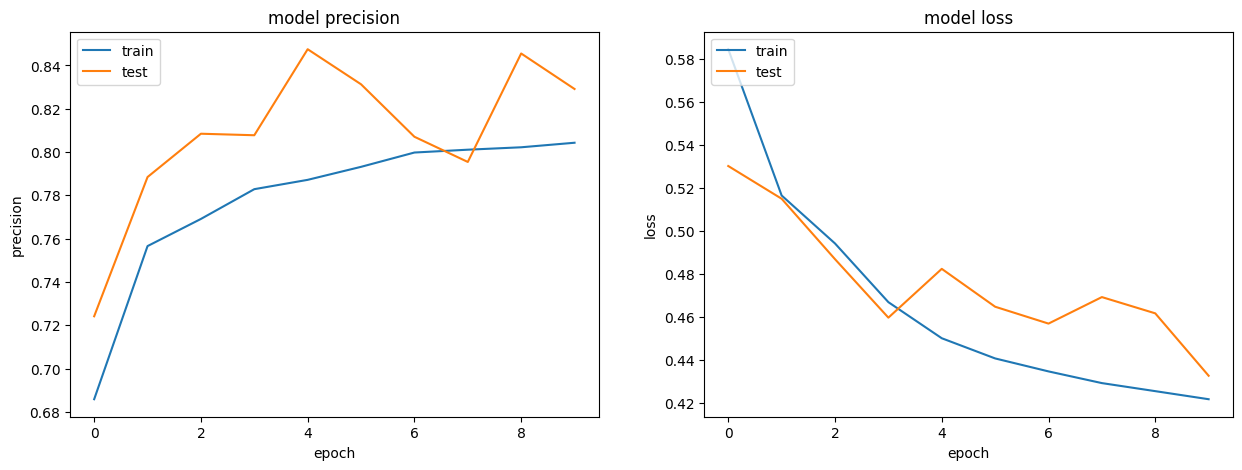

In [152]:
combined = dict()
for key in ['Precision','val_Precision','loss','val_loss']:
    combined[key] = np.hstack([x.history[key] for x in precision_tranformer2l])
    

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(combined['Precision'])
plt.plot(combined['val_Precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(122)
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [155]:
y_predict_proba = model_tranformer2l.predict(X_test)
y_predict = np.round(y_predict_proba)


print(classification_report(y_test, y_predict))

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      5000
           1       0.83      0.78      0.80      5000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



<h2>2.3 Models comparison</h4>

<h4>2.3.1 Evaluation metric comparison  </h4>

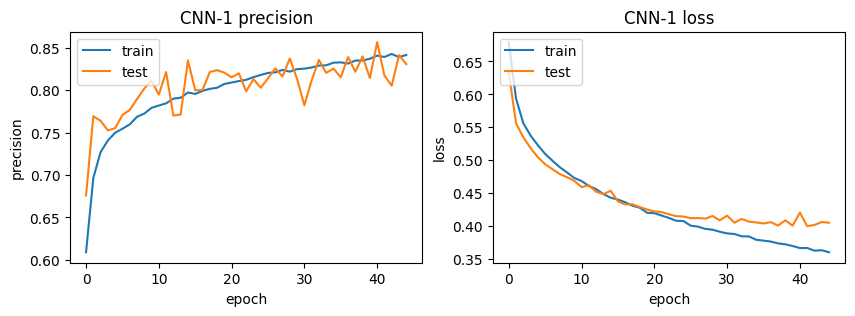

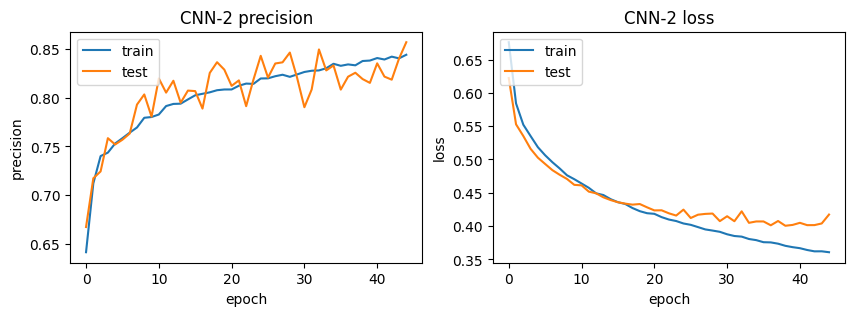

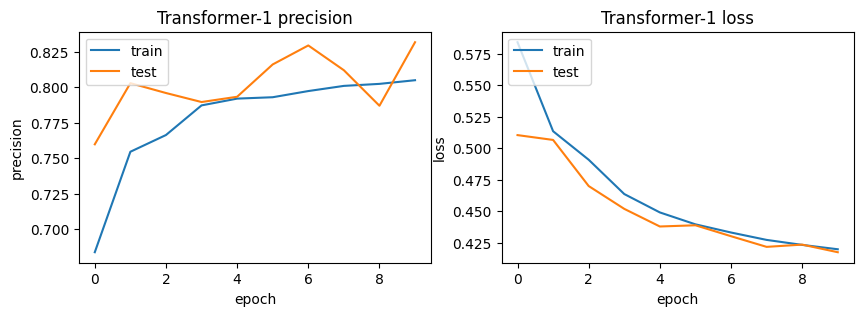

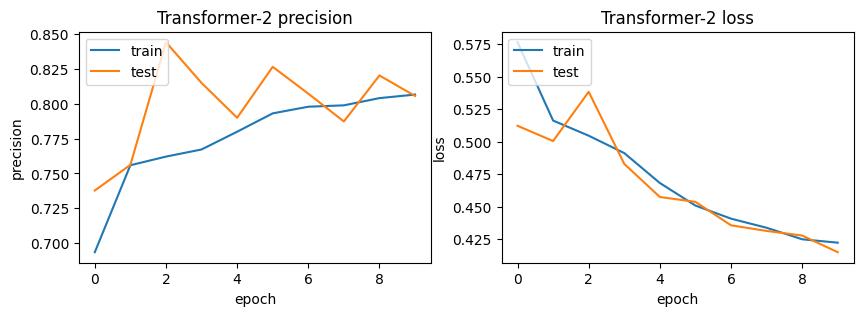

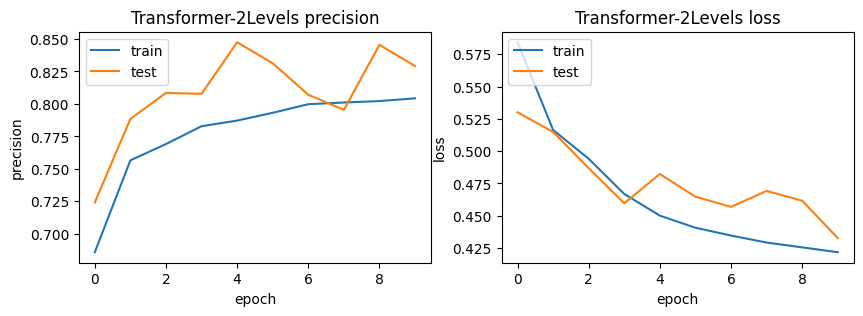

In [156]:
histories = [precision_cnn1, 
             precision_cnn2, 
             precision_tranformer1, 
             precision_tranformer2,
             precision_tranformer2l
             ]

model_names = ['CNN-1',
               'CNN-2',
               'Transformer-1',
               'Transformer-2',
               'Transformer-2Levels'
               ]

for i in range(5):
   
    combined = dict()
    for key in ['Precision','val_Precision','loss','val_loss']:
        combined[key] = np.hstack([x.history[key] for x in histories[i]])
        
    
    plt.figure(figsize=(10,3))
    plt.subplot(121)
    plt.plot(combined['Precision'])
    plt.plot(combined['val_Precision'])
    plt.title(f'{model_names[i]} precision')
    plt.ylabel('precision')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

   
    plt.subplot(122)
    plt.plot(combined['loss'])
    plt.plot(combined['val_loss'])
    plt.title(f'{model_names[i]} loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
plt.show()

<p>Model 1 is the best overall choice due to its balanced precision across both classes (0.81 and 0.83), highest accuracy (0.82), and significantly lower computational cost compared to the other models. While Model 2 has higher precision for class 1, it sacrifices precision for class 0 and has lower recall for class 1. Models 3, 4, and 5 have comparable performance but much higher computational costs. Therefore, Model 1 offers the best combination of performance and efficiency.</p>

<h4>2.3.2 Statistical Comparison "McNemar" </h4>

In [157]:
yhat_model1 = np.argmax(model_cnn1.predict(X_test), axis=1)
yhat_model2 = np.argmax(model_cnn2.predict(X_test), axis=1)
yhat_model3 = np.argmax(model_tranformer1.predict(X_test), axis=1)
yhat_model4 = np.argmax(model_tranformer2.predict(X_test), axis=1)
yhat_model5 = np.argmax(model_tranformer2l.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step


In [158]:
print('The comparison between Model 1 and Model 2 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model1, y_model2=yhat_model2)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 4 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')

print("========================================================================================")        
        
print('The comparison between Model 1 and Model 3 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model1, y_model2=yhat_model3)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')
        
        
print("========================================================================================")        
        
print('The comparison between Model 1 and Model 4 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model1, y_model2=yhat_model4)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')
        
        
print("========================================================================================")   

print('The comparison between Model 1 and Model 5 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model1, y_model2=yhat_model5)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')
        
        
print("========================================================================================")  
    
print('The comparison between Model 2 and Model 3 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model2, y_model2=yhat_model3)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')
        
        
print("========================================================================================")     
        
    
print('The comparison between Model 2 and Model 4 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model2, y_model2=yhat_model4)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')
        
        
print("========================================================================================") 

print('The comparison between Model 2 and Model 5 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model2, y_model2=yhat_model5)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')
        
        
print("========================================================================================") 



print('The comparison between Model 3 and Model 4 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model3, y_model2=yhat_model4)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')
        
        
print("========================================================================================")  

print('The comparison between Model 3 and Model 5 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model3, y_model2=yhat_model5)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')
        
        
print("========================================================================================") 


print('The comparison between Model 4 and Model 5 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model4, y_model2=yhat_model5)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 5 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')
        
        
print("========================================================================================") 

The comparison between Model 1 and Model 2 with 95% confidence interval is as follows:
[[5000    0]
 [   0 5000]]
chi² statistic: inf, p-value: 0.0
Different proportions of errors (reject Null Hypothesis)
The comparison between Model 1 and Model 3 with 95% confidence interval is as follows:
[[5000    0]
 [   0 5000]]
chi² statistic: inf, p-value: 0.0
Different proportions of errors (reject Null Hypothesis)
The comparison between Model 1 and Model 4 with 95% confidence interval is as follows:
[[5000    0]
 [   0 5000]]
chi² statistic: inf, p-value: 0.0
Different proportions of errors (reject Null Hypothesis)
The comparison between Model 1 and Model 5 with 95% confidence interval is as follows:
[[5000    0]
 [   0 5000]]
chi² statistic: inf, p-value: 0.0
Different proportions of errors (reject Null Hypothesis)
The comparison between Model 2 and Model 3 with 95% confidence interval is as follows:
[[5000    0]
 [   0 5000]]
chi² statistic: inf, p-value: 0.0
Different proportions of errors 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\evaluate\mcnemar.py:209: RuntimeWarning: divide by zero encountered in scalar divide
  chi2 = (abs(ary[0, 1] - ary[1, 0]) - 1.0) ** 2 / float(n)
C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\evaluate\mcnemar.py:209: RuntimeWarning: divide by zero encountered in scalar divide
  chi2 = (abs(ary[0, 1] - ary[1, 0]) - 1.0) ** 2 / float(n)
C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\evaluate\mcnemar.py:209: RuntimeWarning: divide by zero encountered in scalar divide
  chi2 = (abs(ary[0, 1] - ary[1, 0]) - 1.0) ** 2 / float(n)
C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\evaluate\mcnemar.py:209: RuntimeWarning: divide by zero encountered in scalar divide
  chi2 = (abs(ary[0, 1] - ary[1, 0]) - 1.0) ** 2 / float(n)
C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\evaluate\mcnema

<p>McNemar's test, used for statistical comparison, consistently rejected the null hypothesis across all model pairs. This statistically validates the use of precision as a reliable metric for comparing the models' performance. Based on these comparisons, Model 1 demonstrated marginally superior precision and is therefore selected as the best-performing model.</p>

<h2>3. Exceptional Work </h2>

<p>This section compares two 300-dimensional pre-trained word embedding techniques: ConceptNet Numberbatch and GloVe.</p>

<h4>3.1 Pre-trained ConceptNet Numberbatch embedding </h4>

In [170]:
%%time

EMBED_SIZE = 300

embeddings_index = {}

f = open(r'conceptnet\numberbatch-en-19.08.txt', encoding='utf-8')


for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


found_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 516783 word vectors.
Embedding Shape: (110490, 300) 
 Total words found: 49083 
 Percentage: 44.42302470811838
CPU times: total: 33 s
Wall time: 33 s


In [171]:

embedding_layer_con = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],
                            input_length=MAX_ART_LEN,
                            trainable=False)

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [172]:
NUM_CLASSES =1

EMBED_SIZE = 300  
sequence_input = Input(shape=(MAX_ART_LEN,), dtype='int32')

embedded_sequences = embedding_layer_con(sequence_input) 
x = Conv1D(100, 3, activation='relu')(embedded_sequences)


x = MaxPooling1D(5)(x)
x = Dropout(0.2)(x)
x = Conv1D(100, 3, activation='relu')(x)



x_mean = GlobalAveragePooling1D()(x) 

x_tmp = Subtract()([x,x_mean])
x_std = GlobalAveragePooling1D()(x_tmp**2)

x = Concatenate(name='concat_1')([x_mean,x_std])


x = Dense(25, activation='relu')(x)

x = Dropout(0.2)(x)

preds = Dense(NUM_CLASSES, activation='sigmoid')(x)

model_con = Model(sequence_input, preds)

opt = Adam(learning_rate=0.0001, epsilon=0.0001, clipnorm=1)


model_con.compile(loss='binary_crossentropy', 
              optimizer=opt,
              metrics=['Precision'])

print(model_con.summary())

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)   │ (None, 400)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_29 (Embedding)      │ (None, 400, 300)          │      33,147,000 │ input_layer_35[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_14 (Conv1D)            │ (None, 398, 100)          │          90,100 │ embedding_29[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_7               │ (None, 79, 100)           │               0 │ conv1d_14[0][0]            │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_85 (Dropout)          │ (None, 79, 100)           │               0 │ max_pooling1d_7[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_15 (Conv1D)            │ (None, 77, 100)           │          30,100 │ dropout_85[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d_24   │ (None, 100)               │               0 │ conv1d_15[0][0]            │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ subtract_7 (Subtract)         │ (None, 77, 100)           │               0 │ conv1d_15[0][0],           │
│                               │                           │                 │ global_average_pooling1d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ power_7 (Power)               │ (None, 77, 100)           │               0 │ subtract_7[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d_25   │ (None, 100)               │               0 │ power_7[0][0]              │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concat_1 (Concatenate)        │ (None, 200)               │               0 │ global_average_pooling1d_… │
│                               │                           │                 │ global_average_pooling1d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_70 (Dense)              │ (None, 25)                │           5,025 │ concat_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_86 (Dropout)          │ (None, 25)                │               0 │ dense_70[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_71 (Dense)              │ (None, 1)                 │              26 │ dropout_86[0][0]           │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 33,272,251 (126.92 MB)

 Trainable params: 125,251 (489.26 KB)

 Non-trainable params: 33,147,000 (126.45 MB)

None


In [173]:
precision_con = []
tmp = model_con.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=10, batch_size=64)
precision_con.append(tmp)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 77ms/step - Precision: 0.5133 - loss: 0.6929 - val_Precision: 0.5846 - val_loss: 0.6923
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - Precision: 0.5746 - loss: 0.6914 - val_Precision: 0.6276 - val_loss: 0.6815
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - Precision: 0.6487 - loss: 0.6622 - val_Precision: 0.8083 - val_loss: 0.5341
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - Precision: 0.7628 - loss: 0.5099 - val_Precision: 0.8140 - val_loss: 0.4589
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - Precision: 0.7827 - loss: 0.4666 - val_Precision: 0.8089 - val_loss: 0.4432
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - Precision: 0.7965 - loss: 0.4416 - val_Precision: 0.8091 - val_loss: 0.4308
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - Precision: 0.8000 - loss: 0.4319 - val_Precision: 0.8125 - val_loss: 0.4217
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - Precision: 0.8040 - 

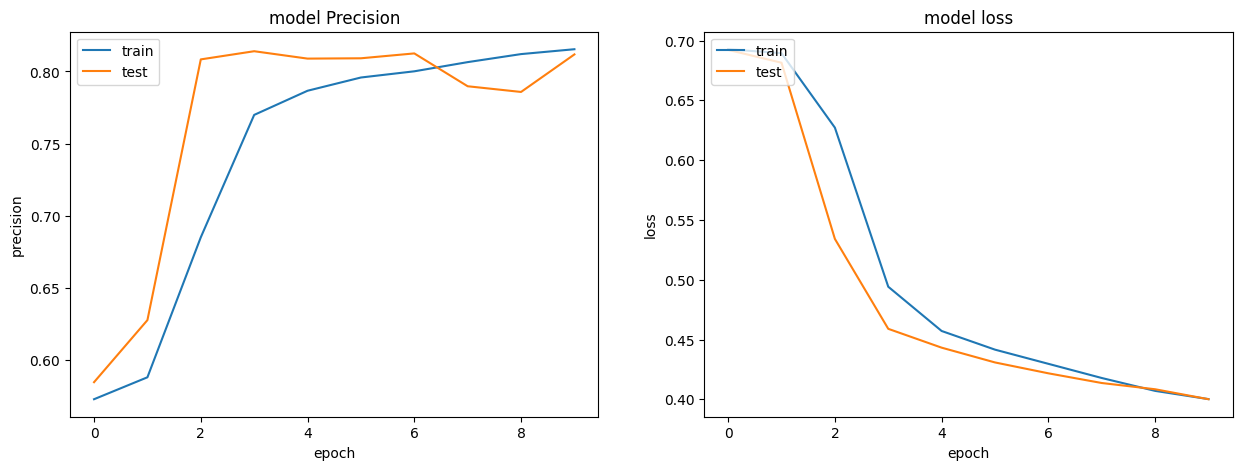

In [174]:
combined = dict()
for key in ['Precision','val_Precision','loss','val_loss']:
    combined[key] = np.hstack([x.history[key] for x in precision_con])
    

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(combined['Precision'])
plt.plot(combined['val_Precision'])
plt.title('model Precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(122)
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [175]:
y_predict_proba = model_con.predict(X_test)
y_predict = np.round(y_predict_proba)


print(classification_report(y_test, y_predict))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      5000
           1       0.81      0.83      0.82      5000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



<h4>3.2. Pre-trained GloVe</h4>

In [177]:
%%time

EMBED_SIZE = 300
embeddings_index = {}
f = open(r'glove\glove.6B.300d.txt', encoding="utf-8")




for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


found_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 400000 word vectors.
Embedding Shape: (110490, 300) 
 Total words found: 53974 
 Percentage: 48.8496696533623
CPU times: total: 27.3 s
Wall time: 27.4 s


In [178]:
NUM_CLASSES =1
EMBED_SIZE = 300  
sequence_input = Input(shape=(MAX_ART_LEN,), dtype='int32')
embedded_sequences = embedding_layer_con(sequence_input)
x = Conv1D(100, 3, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Dropout(0.2)(x)
x = Conv1D(100, 3, activation='relu')(x)
x_mean = GlobalAveragePooling1D()(x) 
x_tmp = Subtract()([x,x_mean])
x_std = GlobalAveragePooling1D()(x_tmp**2)
x = Concatenate(name='concat_1')([x_mean,x_std])
x = Dense(25, activation='relu')(x)
x = Dropout(0.2)(x)
preds = Dense(NUM_CLASSES, activation='sigmoid')(x)
model_glove = Model(sequence_input, preds)
opt = Adam(learning_rate=0.0001, epsilon=0.0001, clipnorm=1)
model_glove.compile(loss='binary_crossentropy', 
              optimizer=opt,
              metrics=['Precision'])

print(model_glove.summary())

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_36 (InputLayer)   │ (None, 400)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_29 (Embedding)      │ (None, 400, 300)          │      33,147,000 │ input_layer_36[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_16 (Conv1D)            │ (None, 398, 100)          │          90,100 │ embedding_29[1][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_8               │ (None, 79, 100)           │               0 │ conv1d_16[0][0]            │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_87 (Dropout)          │ (None, 79, 100)           │               0 │ max_pooling1d_8[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_17 (Conv1D)            │ (None, 77, 100)           │          30,100 │ dropout_87[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d_26   │ (None, 100)               │               0 │ conv1d_17[0][0]            │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ subtract_8 (Subtract)         │ (None, 77, 100)           │               0 │ conv1d_17[0][0],           │
│                               │                           │                 │ global_average_pooling1d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ power_8 (Power)               │ (None, 77, 100)           │               0 │ subtract_8[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d_27   │ (None, 100)               │               0 │ power_8[0][0]              │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concat_1 (Concatenate)        │ (None, 200)               │               0 │ global_average_pooling1d_… │
│                               │                           │                 │ global_average_pooling1d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_72 (Dense)              │ (None, 25)                │           5,025 │ concat_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_88 (Dropout)          │ (None, 25)                │               0 │ dense_72[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_73 (Dense)              │ (None, 1)                 │              26 │ dropout_88[0][0]           │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 33,272,251 (126.92 MB)

 Trainable params: 125,251 (489.26 KB)

 Non-trainable params: 33,147,000 (126.45 MB)

None


In [180]:
precision_glove = []
tmp = model_glove.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=10, batch_size=64)
precision_glove.append(tmp)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - Precision: 0.5412 - loss: 0.6928 - val_Precision: 0.5754 - val_loss: 0.6915
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - Precision: 0.5807 - loss: 0.6902 - val_Precision: 0.6383 - val_loss: 0.6769
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - Precision: 0.6535 - loss: 0.6519 - val_Precision: 0.8013 - val_loss: 0.5115
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - Precision: 0.7570 - loss: 0.4993 - val_Precision: 0.7842 - val_loss: 0.4530
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - Precision: 0.7830 - loss: 0.4612 - val_Precision: 0.8032 - val_loss: 0.4426
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - Precision: 0.7953 - loss: 0.4412 - val_Precision: 0.8388 - val_loss: 0.4375
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - Precision: 0.8008 - loss: 0.4319 - val_Precision: 0.8275 - val_loss: 0.4221
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - Precision: 0.8072 - 

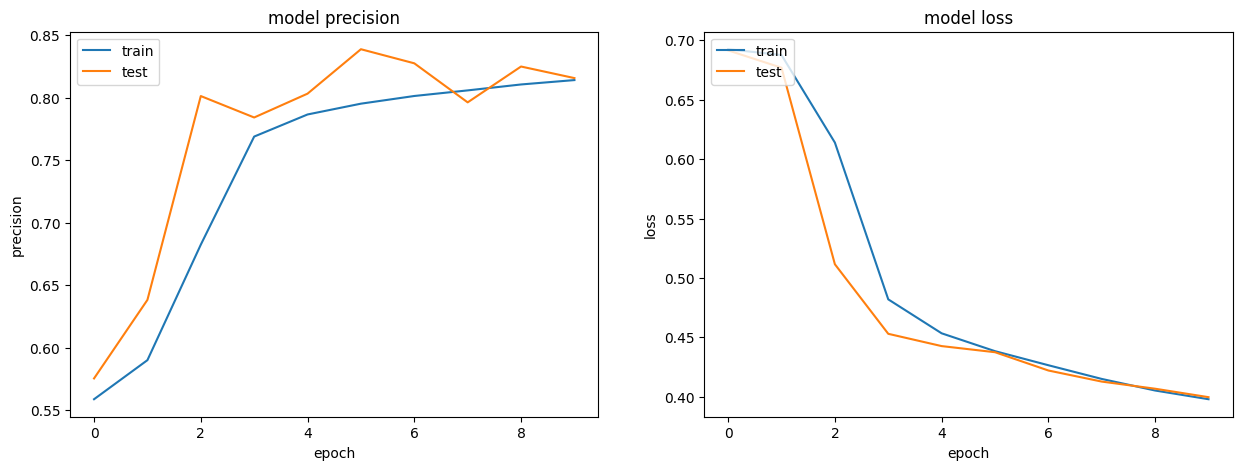

In [181]:
combined = dict()
for key in ['Precision','val_Precision','loss','val_loss']:
    combined[key] = np.hstack([x.history[key] for x in precision_glove])
    

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(combined['Precision'])
plt.plot(combined['val_Precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(122)
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [182]:
y_predict_proba = model_glove.predict(X_test)
y_predict = np.round(y_predict_proba)

print(classification_report(y_test, y_predict))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      5000
           1       0.82      0.83      0.82      5000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



<h4>3.3 Statistical comparison using McNemar</h4>

In [183]:
yhat_model11 = np.argmax(model_con.predict(X_test), axis=1)
yhat_model22 = np.argmax(model_glove.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


In [184]:
print('The comparison between Model 1 and Model 2 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_model11, y_model2=yhat_model22)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 2 and 4 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')

The comparison between Model 1 and Model 2 with 95% confidence interval is as follows:
[[5000    0]
 [   0 5000]]
chi² statistic: inf, p-value: 0.0
Different proportions of errors (reject Null Hypothesis)


C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\evaluate\mcnemar.py:209: RuntimeWarning: divide by zero encountered in scalar divide
  chi2 = (abs(ary[0, 1] - ary[1, 0]) - 1.0) ** 2 / float(n)


<p>McNemar's test, used to statistically compare models trained with ConceptNet Numberbatch and GloVe embeddings, resulted in rejection of the null hypothesis. This supports the validity of using precision as a comparison metric. Specifically, Model 2 (using pre-trained GloVe embeddings) achieved marginally higher precision.</p>

<h4>References</h4>
<ul>
    <li>Machine Learning Notebooks by eclarson (GitHub Repository): <a href="https://github.com/eclarson/MachineLearningNotebooks" target="_blank">https://github.com/eclarson/MachineLearningNotebooks</a></li>
    <li>OpenAI GPT Model: <a href="https://chatgpt.com/" target="_blank">https://chatgpt.com/</a></li>
    <li>Amazon reviews Dataset: <a href="https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews?resource=download" target="_blank">https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews?resource=download</a></li>
    <li>ConceptNet NumberBatch: <a href="https://www.kaggle.com/datasets/joeskimo/conceptnet/code" target="_blank">https://www.kaggle.com/datasets/joeskimo/conceptnet/code</a></li>
</ul>
